# Análise Exploratória

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from lazypredict.Supervised import LazyClassifier
from scipy import stats

## Coleta dos dados

In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.88,82.00,6.50,202.94,rice,NaN,NaN
1,85,58,41,21.77,80.32,7.04,226.66,rice,NaN,NaN
2,60,55,44,23.00,82.32,7.84,263.96,rice,NaN,NaN
3,74,35,40,26.49,80.16,6.98,242.86,rice,NaN,NaN
4,78,42,42,20.13,81.60,7.63,262.72,rice,NaN,NaN


In [3]:
df = df.drop(['Unnamed: 8', 'Unnamed: 9'], axis=1)
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice
3,74,35,40,26.49,80.16,6.98,242.86,rice
4,78,42,42,20.13,81.60,7.63,262.72,rice


## Medidas descritivas

In [4]:
df.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00
mean,50.55,53.36,48.15,25.62,71.48,6.47,103.46
std,36.92,32.99,50.65,5.06,22.26,0.77,54.96
min,0.00,5.00,5.00,8.83,14.26,3.50,20.21
25%,21.00,28.00,20.00,22.77,60.26,5.97,64.55
50%,37.00,51.00,32.00,25.60,80.47,6.43,94.87
75%,84.25,68.00,49.00,28.56,89.95,6.92,124.27
max,140.00,145.00,205.00,43.68,99.98,9.94,298.56


## Visualização dos dados

In [5]:
labels = df['label'].astype('category').values
labels = list(labels.categories)
labels

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

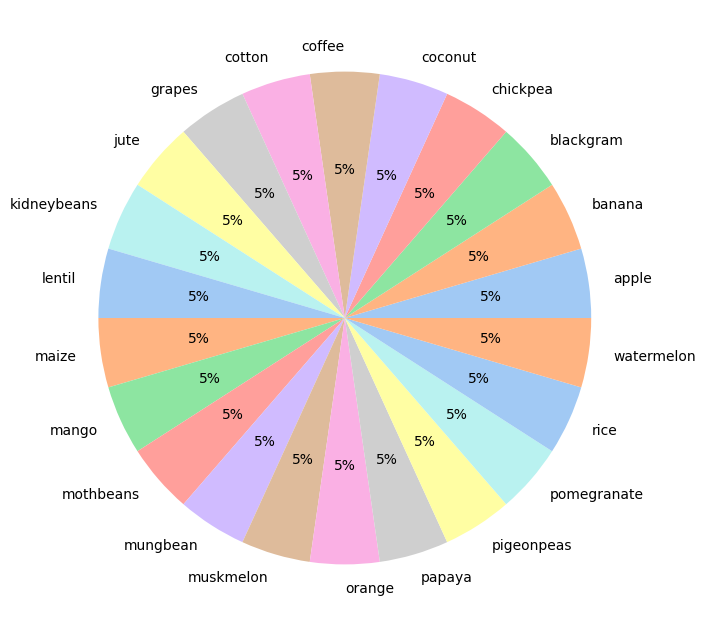

In [6]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')

plt.pie(df['label'].groupby(df['label']).count(), labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

É possível perceber que a distribuição dos valores é idêntica.

### Matriz de correlação

In [7]:
corr = df.corr()
corr

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
Nitrogen,1.00,-0.23,-0.14,0.03,0.19,0.10,0.06
phosphorus,-0.23,1.00,0.74,-0.13,-0.12,-0.14,-0.06
potassium,-0.14,0.74,1.00,-0.16,0.19,-0.17,-0.05
temperature,0.03,-0.13,-0.16,1.00,0.21,-0.02,-0.03
humidity,0.19,-0.12,0.19,0.21,1.00,-0.01,0.09
ph,0.10,-0.14,-0.17,-0.02,-0.01,1.00,-0.11
rainfall,0.06,-0.06,-0.05,-0.03,0.09,-0.11,1.00


<Axes: >

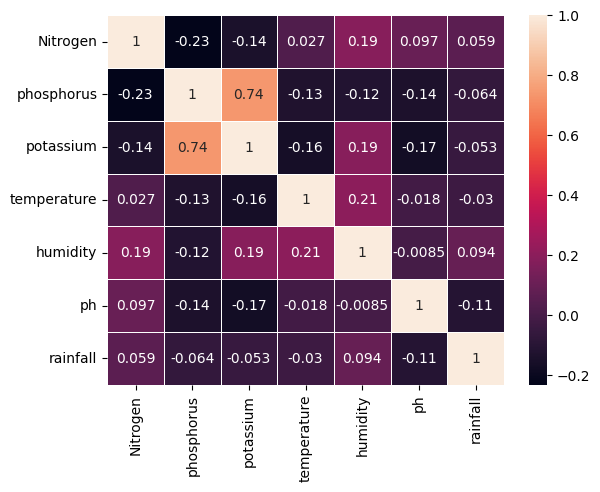

In [8]:
# Mapa de calor com as correlações
sns.heatmap(corr, annot=True, linewidths=0.5)

A maior parte das variáveis **não** estão relacionadas entre si, com exceção dos atributos "potassium" e "phosphorus", que possuem uma correlação positiva considerável. Abaixo é possível visualizar uma matriz de dispersão:

In [9]:
# sns.pairplot(df, hue='label')

É possível observar, como anteriormente, que aparentemente não há grande correlação entre as variáveis

Abaixo, é realizado um teste de hipóteses para verificar se a variável 'ph' provém de uma distribuição normal. Seguem as hipóteses:

$$
\begin{cases}
H_0: X \sim N(\mu, \sigma) \\
H_1: X \text{ não possui distribuição normal}
\end{cases}
$$

onde $X$ denota a variável 'ph'.

In [10]:
_, p_value = stats.shapiro(df['ph'])
alpha = 0.05

if p_value < alpha:
    print("A um nível de significância de 95%, rejeita-se a hipótese nula")
else:
    print("A um nível de confiança de 95%, é plausível inferir que a variável 'ph' possui distribuição normal")

A um nível de significância de 95%, rejeita-se a hipótese nula


In [11]:
df.head(3)

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice


In [14]:
dummies = pd.get_dummies(df['label'])

In [17]:
new_df = pd.concat([df,dummies], axis=1)
new_df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,apple,banana,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,90,42,43,20.88,82.00,6.50,202.94,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
1,85,58,41,21.77,80.32,7.04,226.66,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
2,60,55,44,23.00,82.32,7.84,263.96,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
3,74,35,40,26.49,80.16,6.98,242.86,rice,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,42,42,20.13,81.60,7.63,262.72,rice,0,0,...,0,0,0,0,0,0,0,0,1,0


<Axes: >

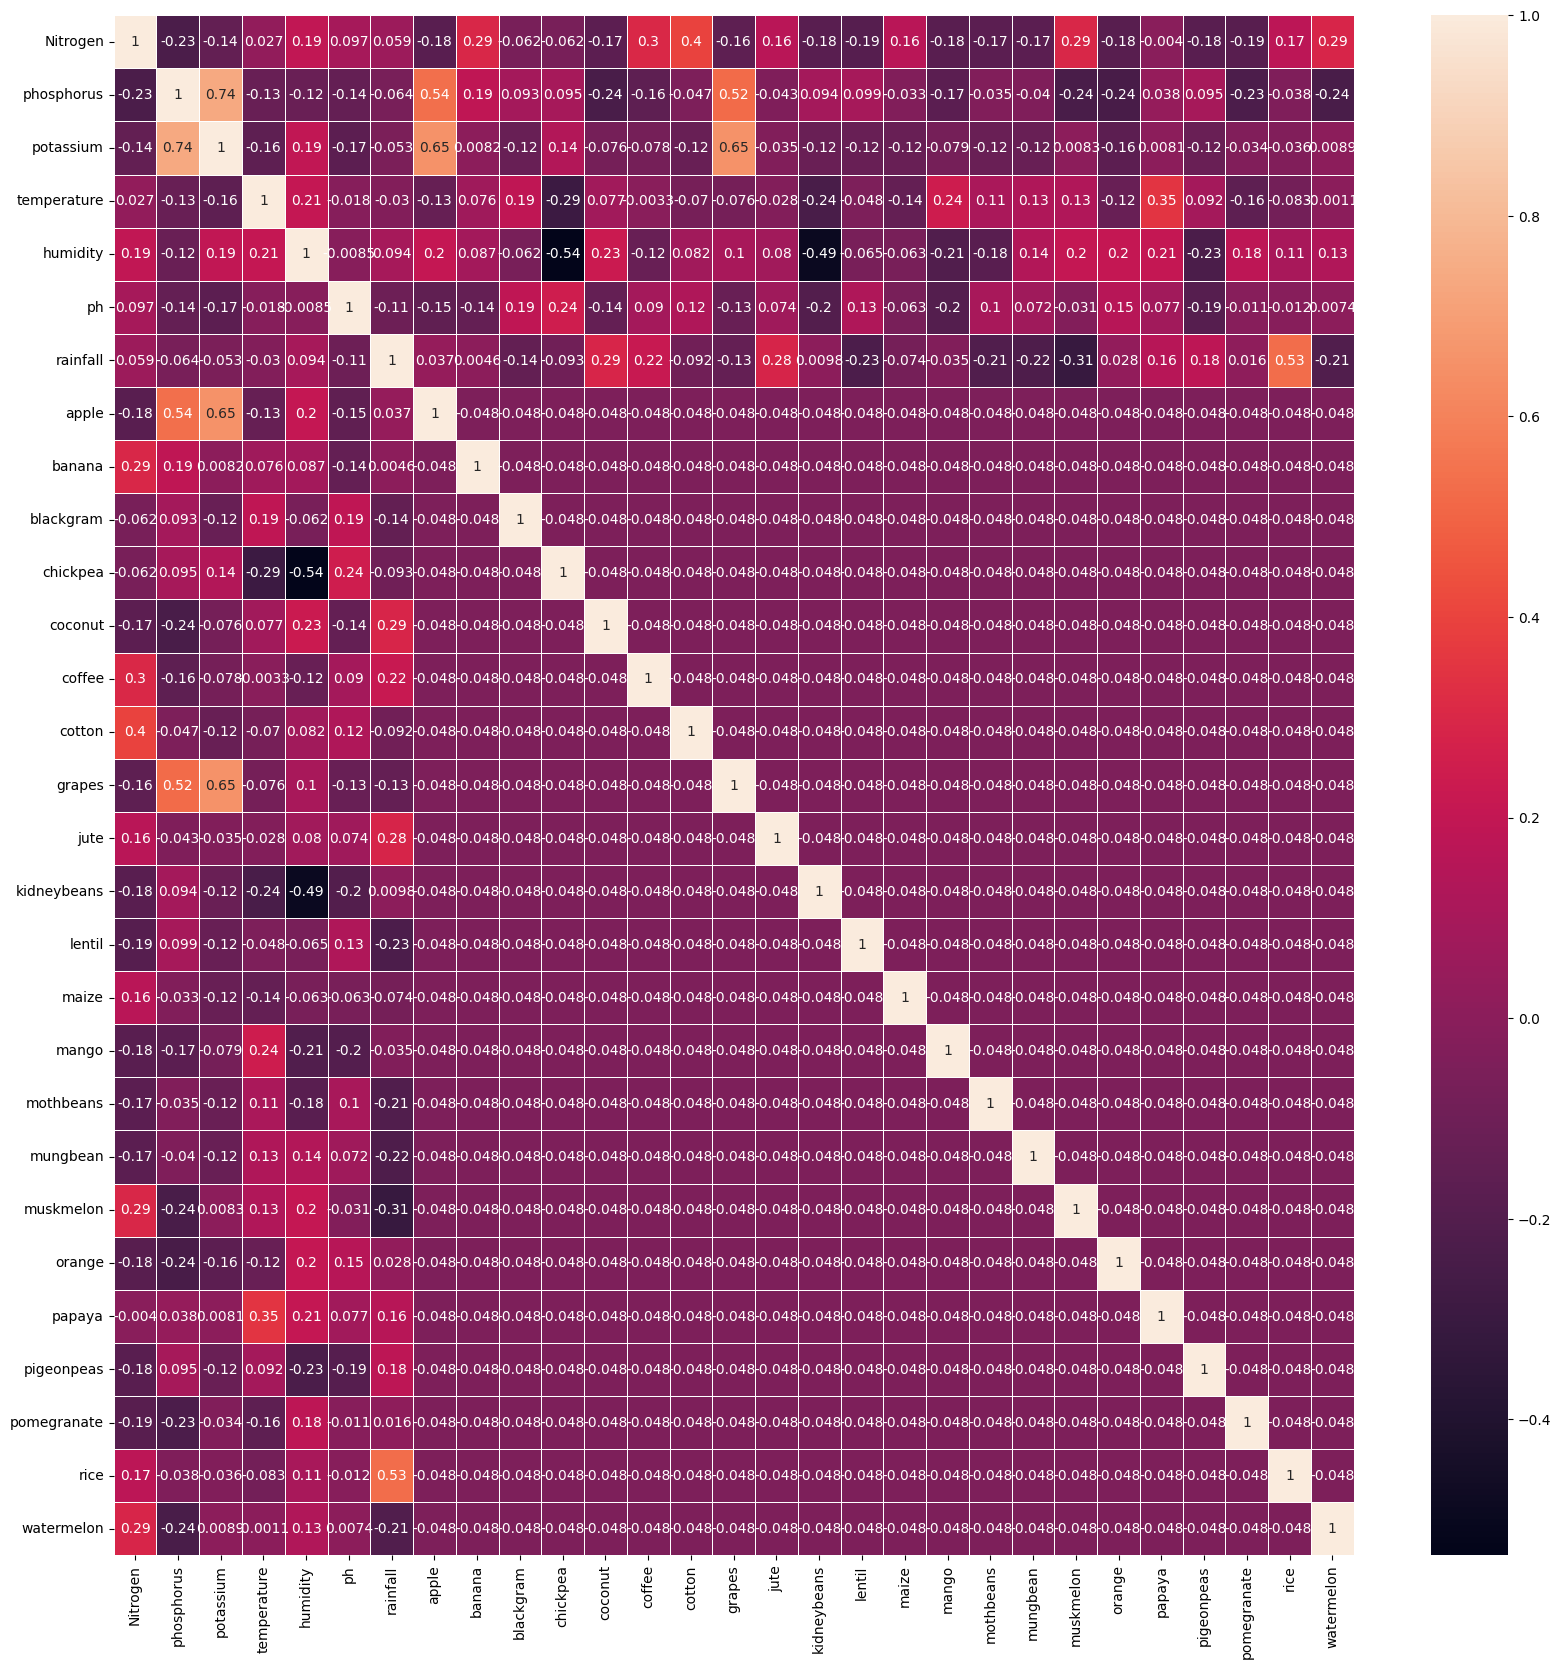

In [19]:
# Mapa de calor com as correlações
plt.figure(figsize=(20,20))
corr = new_df.corr()
sns.heatmap(corr, annot=True, linewidths=0.5)

In [20]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X = df.drop('label',axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:11<00:00,  2.61it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.99,0.99,None,0.99,0.45
RandomForestClassifier,0.99,0.99,None,0.99,0.52
GaussianNB,0.99,0.99,None,0.99,0.05
QuadraticDiscriminantAnalysis,0.99,0.99,None,0.99,0.13
LGBMClassifier,0.99,0.99,None,0.99,6.07
BaggingClassifier,0.99,0.99,None,0.99,0.12
DecisionTreeClassifier,0.98,0.98,None,0.98,0.04
SVC,0.98,0.98,None,0.98,0.11
LabelPropagation,0.98,0.98,None,0.98,0.41
